绘图notebook

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import seaborn as sns
# 过滤警告
import warnings

warnings.filterwarnings("ignore")

In [23]:
# 加载权重数据
# 内连接权重 D:\BrainC\dataset\inner_weights.pt
# 外连接权重 D:\BrainC\dataset\outer_weights.pt

# 加载内连接权重
inner_weights = np.array(torch.load(r"D:\BrainC\dataset\inner_weights.pt"))
# 加载外连接权重
outer_weights = np.array(torch.load(r"D:\BrainC\dataset\outer_weights.pt"))
inner_weights.shape, outer_weights.shape

((8, 4005), (56, 4500))

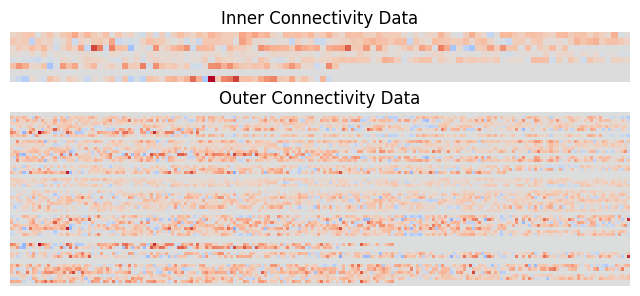

In [51]:
# 绘制为热力图，两行一列
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
# 长宽相等
sns.heatmap(inner_weights[:, 100:200], cmap="coolwarm", center=0, square=True, cbar=False)
plt.title("Inner Connectivity Data")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 1, 2)
sns.heatmap(outer_weights[:, 200:400], cmap="coolwarm", center=0, square=True, cbar=False)
plt.title("Outer Connectivity Data")
plt.xticks([])
plt.yticks([])

# 调整子图间隙
plt.subplots_adjust(hspace=-0.7)

plt.show()

In [54]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes with labels
G.add_node("Input Features (X)", pos=(0, 4))
G.add_node("Linear Transformation (W)", pos=(0, 3))
G.add_node("Attention Coefficients (e_ij)", pos=(0, 2))
G.add_node("Normalized Attention Coefficients (α_ij)", pos=(0, 1))
G.add_node("Weighted Sum", pos=(0, 0))
G.add_node("Output Features (H')", pos=(0, -1))

# Add edges with labels
G.add_edge("Input Features (X)", "Linear Transformation (W)")
G.add_edge("Linear Transformation (W)", "Attention Coefficients (e_ij)")
G.add_edge("Attention Coefficients (e_ij)", "Normalized Attention Coefficients (α_ij)")
G.add_edge("Normalized Attention Coefficients (α_ij)", "Weighted Sum")
G.add_edge("Weighted Sum", "Output Features (H')")

# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph with rounded rectangles and shorter arrows
plt.figure(figsize=(10, 8))
ax = plt.gca()
for node in G.nodes:
    x, y = pos[node]
    ax.text(x, y, node, ha='center', va='center', fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='skyblue'))

nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', min_source_margin=15, min_target_margin=15)

# Add GATConv parameters information
params_info = (
    "GATConv(\n"
    "    -1,\n"
    "    hidden_size,\n"
    "    heads=8,\n"
    "    dropout=drop_rate,\n"
    "    concat=True,\n"
    "    negative_slope=0.2,\n"
    "    add_self_loops=True,\n"
    "    edge_dim=edge_features_dim,\n"
    "    bias=True,\n"
    "    residual=True\n"
    ")"
)
ax.text(1.5, 2, params_info, ha='left', va='center', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgrey'))

plt.title("Internal Structure of GAT Block with Parameters")
plt.axis('off')
plt.show()


ValueError: Image size of 205381x656 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x800 with 1 Axes>